# <span style = "color:#d10683; font-family:franklin gothic medium"> Feature Engineering and Data Preperation</span>

### <span style = "color:#d10683; font-family:franklin gothic medium"> Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques</span>

#### <span style = "color:#d10683; font-family:franklin gothic medium">There are three gerenal approaches to feature engineering:
* Extracting Information
* Combining Information
* Trasnforming Information

## <span style = "color:#d10683; font-family:franklin gothic medium"> Extracting Information
* There is no coefficient we can apply for a non-numeric data points
* In general for most algorithms we need to make sure features are float or int
* For e.g Date timestamp(1990-12-01 09:26:03)
* Instead we extract information for date as 1990-12-01 09:26:03
    * Year: 1990
    * Month:12
    * Weekday or Weekend(0/1)
    * Mon:1.Tues:2,...Sun:7</span>

## <span style = "color:#d10683; font-family:franklin gothic medium">Combining Information
* We've actually already done this with Polynomial Regression!
* Could also combine extracted information:
    * New Features:
        * 0 or 1 value indicating:
        * Both Weekend and evening?</span>

## <span style = "color:#d10683; font-family:franklin gothic medium"> Trasnforming Information
* Very common for string data
* Most algorithms can not accept string data(can't multiply a string such as 'red' by a numeric coefficient)
* Often categorical data is presented as string data
    * We can use two approaches here:
        * Integer Encoding
        * One-hot Encoding(Dummy Varibales)

### <span style = "color:#d10683; font-family:franklin gothic medium"> Integer Encoding
* Directly cover categories into integers 1,2,3,...N

#### <span style = "color:red; font-family:franklin gothic medium">A possible issue is implied ordering and relationship (Ordinal Varibale)</span>

### <span style = "color:#d10683; font-family:franklin gothic medium">It does make sense to do interger coding where you have categorical variable has order to it.</span>

## <span style = "color:#d10683; font-family:franklin gothic medium"> One Hot Encoding(Dummy Varibales)
* Convert each category into individual features are either 0 or 1.

#### <span style = "color:red; font-family:franklin gothic medium">One main issue with One Hot Encoding is it increases the huge number of columns increasing dimentionality, though we can try to reduce feature column expansion by creating higher level categories but for that domain knowledge plays an important role</span> 

### <span style = "color:#d10683; font-family:franklin gothic medium"> Also we must be aware of the"dummy varibale trap", mathematically known as multi-collinearity.</span>
#### <span style = "color:#d10683; font-family:franklin gothic medium"> Converting to dummy varibales can casue features to be duplicated</span>
#### <span style = "color:#d10683; font-family:franklin gothic medium">This can be fixed by droping the last features of dummy varibles, as they both contain the same information</span>

# <span style = "color:#550182; font-family:franklin gothic medium"> Dealing with Outliers</span>

### <span style = "color:#550182; font-family:franklin gothic medium"> Outliers consideratins
* Defination of an outlier
    * Range and limits
    * Percentage of the data you are reffering as outlier

###### <span style = "color:#550182; font-family:franklin gothic medium"> There is no 100% solution that how you deal with outliers but rather it is domain dependent!</span>

### <span style = "color:#550182; font-family:franklin gothic medium"> Range and Limits
* We need to decide what will constitute an outlier with some methodology:
    * Interquartile Range (like Box Plot)
    * Standard Deviation
    * Visualized or Domain Limit Value</span>

### <span style = "color:#550182; font-family:franklin gothic medium"> Percentage of Data
* We need to keep in mind if a large percentage of your data being labeled as an outlier, they you actually just have      a wide distibution, not outliers!
* Limit to a few paercentage points at most </span>

### <span style = "color:#550182; font-family:franklin gothic medium"> Other considerations
* Utilize visualization plots to be able to see and identify outlier points like scatter plots, box plots.
* Keep in mind, outlier removal creates a caveats for your future model (e.g. Model not suitable for houses priced over $10 miliion)

## <span style = "color:#550182; font-family:franklin gothic medium"> Outlier - practical

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def create_ages(mu= 50, sigma = 13, num_samples = 100, seed = 42):
    # Set a random seed in the same cell as the random call
    np.random.seed(seed)
    
    sample_ages = np.random.normal(loc = mu, scale = sigma, size = num_samples)
    sample_ages = np.round(sample_ages, decimals=0)
    
    return sample_ages
# this function to creates a nomarl dist centered around 50

In [3]:
sample = create_ages()

In [4]:
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

#### <span style = "color:#550182; font-family:franklin gothic medium"> First check the distribution of the dataset

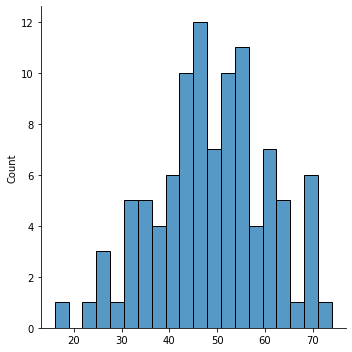

In [5]:
sns.displot(sample, bins = 20);

C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

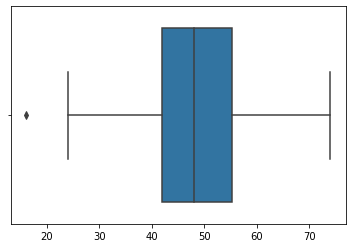

In [6]:
sns.boxplot(sample) # boxplot is based on IQR methodlogy

### <span style = "color:#550182; font-family:franklin gothic medium"> Let's do IQR mathematcially

In [7]:
ser = pd.Series(sample)

In [8]:
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

### <span style = "color:#550182; font-family:franklin gothic medium"> IQR lies between 75th percentile and 25th percentile

In [9]:
IQR = 55.25 - 42.00 # 75th percentile - 25th percentile
Lower_limit = 42.00 - 1.5 * (IQR)

In [10]:
Lower_limit

22.125

In [11]:
ser[ser >Lower_limit]

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 99, dtype: float64

#### <span style = "color:#550182; font-family:franklin gothic medium"> Another numpy way of calculating percentile

In [12]:
q75,q25 = np.percentile(sample,[75,25])

In [13]:
iqr = q75-q25

In [14]:
iqr

13.25

In [15]:
lower_limit = q25-1.5*(iqr)

In [16]:
lower_limit

22.125

In [17]:
upper_limit = q75 + 1.5*(iqr)

In [18]:
upper_limit

75.125

### <span style = "color:#550182; font-family:franklin gothic medium">Upper limit is almost 75 and in Box plot it is evident

In [19]:
df = pd.read_csv("Ames_Housing_Data.csv")

In [20]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [21]:
data = df.copy()

### <span style = "color:#550182; font-family:franklin gothic medium"> With this dataset out Label or target varibale is "SalePrice".

In [23]:
data.corr()["SalePrice"].sort_values() # It shows evry single varible and its correlation with Sale Price

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

#### <span style = "color:#550182; font-family:franklin gothic medium"> Here we can see Overall Qaulity highly correlated with Sale Price, Let's do scatter plot between both

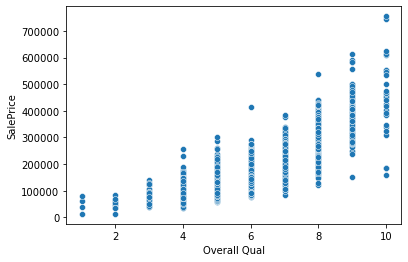

In [24]:
sns.scatterplot(x = "Overall Qual", y = "SalePrice",data = data );

#### <span style = "color:#550182; font-family:franklin gothic medium"> With this scatterplot we can make out the overall quality is a variable of numbers between 1 to 10

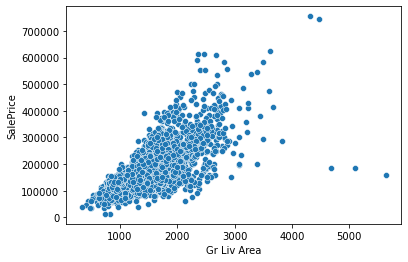

In [25]:
sns.scatterplot(x = 'Gr Liv Area', y = 'SalePrice', data = data);

In [26]:
data[(data["Overall Qual"]>8) & (data["SalePrice"]<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


### <span style = "color:#550182; font-family:franklin gothic medium"> We can see from the Scatter plot there are three houses prices which are of goood quality but with lowere price this is out of trend and these kind of outlier we want don't want in out dataset for modelling

### <span style = "color:#550182; font-family:franklin gothic medium"> let's remove these outliers

In [27]:
data[(data["Gr Liv Area"]>4000) & (data["SalePrice"]<400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


<span style = "color:#550182; font-family:franklin gothic medium"> From Index number we can see these rows are present in above Overall quality outlier

In [28]:
drop_index = data[(data["Gr Liv Area"]>4000) & (data["SalePrice"]<400000)].index

In [29]:
drop_index # We get the index numbers for those

Int64Index([1498, 2180, 2181], dtype='int64')

In [30]:
data = data.drop(drop_index, axis = 0)

#### <span style = "color:#550182; font-family:franklin gothic medium"> Repeat the scatterplot to check

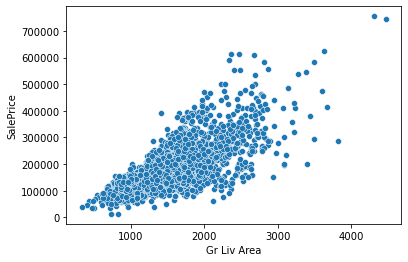

In [31]:
sns.scatterplot(x = 'Gr Liv Area', y = 'SalePrice', data = data);

# <span style = "color:#03738f; font-family:franklin gothic medium"> Dealing with Missing Data: Evaluation of Missing Data

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [33]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### <span style = "color:#03738f; font-family:franklin gothic medium"> We can see PID is a unique identifier for each row, and since we already have index to do the same job we can drop PID

In [34]:
data = data.drop("PID", axis = 1)

In [35]:
len(data.columns)

80

In [36]:
data.isnull().sum()# to check how many rows we have as missing values for each varibale

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

### <span style = "color:#03738f; font-family:franklin gothic medium"> We would like to know what percentage of value missing from a feature.

In [37]:
100 * data.isnull().sum() / len(data)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

### <span style = "color:#03738f; font-family:franklin gothic medium"> We can also create function to be used in future to check it

In [38]:
def percent_missing(data):
    percent_nan = 100 * data.isnull().sum() / len(data)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    
    return percent_nan

In [39]:
percent_nan = percent_missing(data)

In [40]:
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

### <span style = "color:#03738f; font-family:franklin gothic medium"> We can see the above information in barplot as well

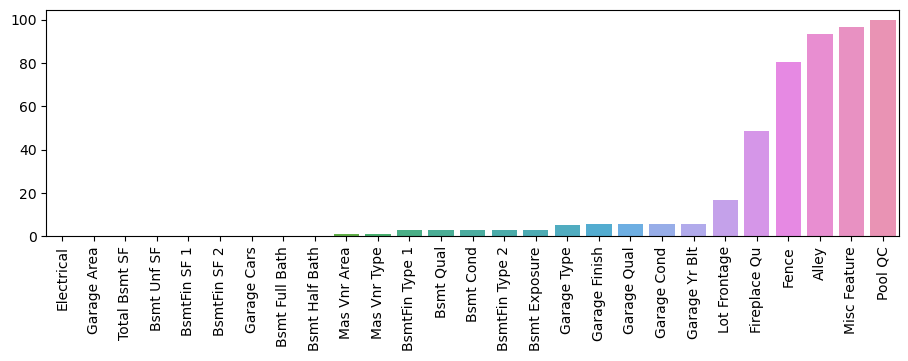

In [41]:
plt.figure(figsize=(11,3), dpi = 100)
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90);

# <span style = "color:#03738f; font-family:franklin gothic medium"> Filling or Dropping data based on Rows

### <span style = "color:#03738f; font-family:franklin gothic medium">
* In the case of just few rows missing the feature data, we'll consider either dropping these few rows or filling in with a reasonable assumptions based off domain knowledge


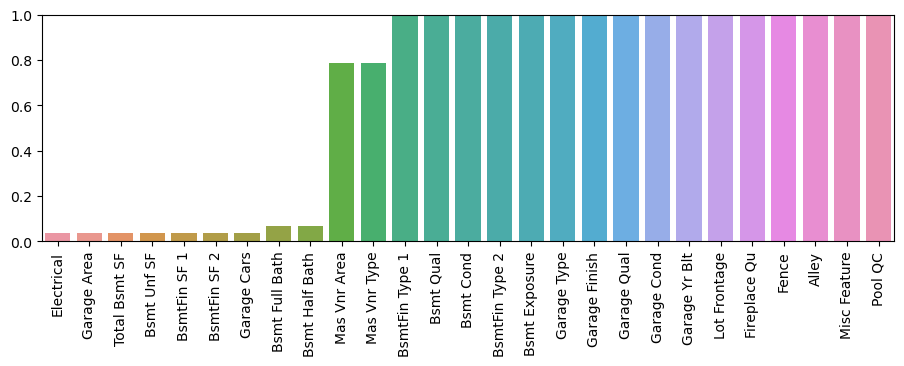

In [42]:
# lets check the data where missing data is less that 1%
plt.figure(figsize=(11,3), dpi = 100)
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90)
plt.ylim(0,1);

### <span style = "color:#03738f; font-family:franklin gothic medium"> We can see many of the features here crossed our 1% threshold, but first we want to check which features are really have very low % data missing

In [43]:
percent_nan[percent_nan <1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [44]:
data[data['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


### <span style = "color:#03738f; font-family:franklin gothic medium"> We have found electrical has one row missing let's check does it have anyother feature missing

In [45]:
data[data["Electrical"].isnull()]["Garage Area"] # we can see garage area is not missing in this row

1577    400.0
Name: Garage Area, dtype: float64

In [46]:
data[data["Bsmt Half Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


### <span style = "color:#03738f; font-family:franklin gothic medium"> When we are dropping the missing values we need to start with lower percentage missing to higher percentage missing values

In [ ]:
data = data.dropna(axis = 0, subset=["Electrical","Garage Cars"])

In [48]:
percent_nan = percent_missing(data)

In [49]:
percent_nan[percent_nan<1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

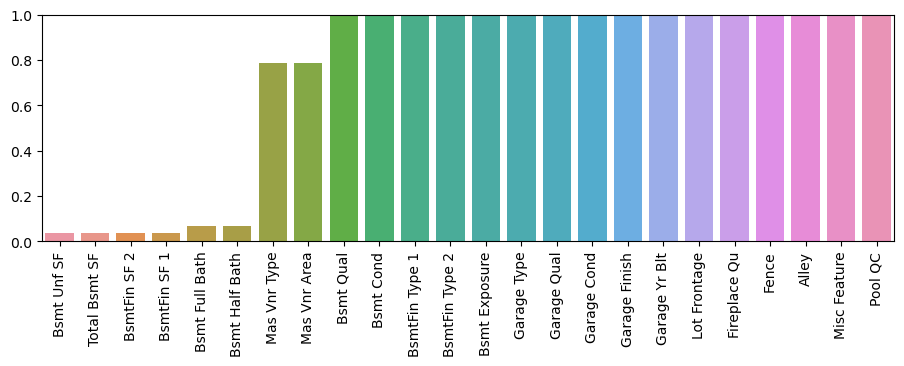

In [50]:
# lets check the data where missing data is less that 1%
plt.figure(figsize=(11,3), dpi = 100)
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90)
plt.ylim(0,1);

### <span style = "color:#03738f; font-family:franklin gothic medium"> Let's check further whether or not we should fill in  the missing values, and here it becomes important to have good domain knowledge</span>
### <span style = "color:#03738f; font-family:franklin gothic medium"> We can see here some of the features has common in them as basedment , let's take a closer look on them first</span>

In [51]:
data[data['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [52]:
data[data['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


### <span style = "color:#03738f; font-family:franklin gothic medium"> We can see for both the features has same index number missing, lets check the other two</span>

In [53]:
data[data['Bsmt Unf SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [54]:
data[data['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


### <span style = "color:#03738f; font-family:franklin gothic medium"> We can see for both the featues has same index number missing, lets check the other two</span>

In [57]:
# BSMT numerica columns --> fillna to 0
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2','Bsmt Unf SF', 'Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']

data[bsmt_num_cols] = data[bsmt_num_cols].fillna(0)
# BSMT String Col

bsmt_str_cols = ['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']

data[bsmt_str_cols]=data[bsmt_str_cols].fillna('None')

In [58]:
data[data["Bsmt Full Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


### <span style = "color:#03738f; font-family:franklin gothic medium">We will redo the scatter plot to see the remaining missing values</span>

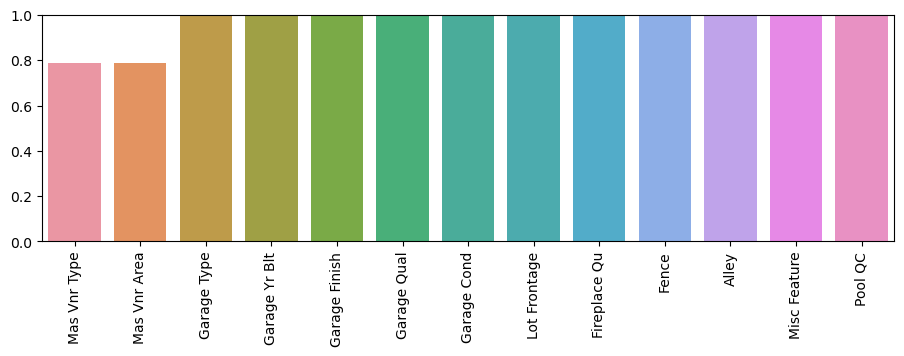

In [59]:

percent_nan = percent_missing(data)

plt.figure(figsize=(11,3), dpi = 100)
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90)
plt.ylim(0,1);

### <span style = "color:#03738f; font-family:franklin gothic medium">We are now left with two features with less than 1% threshold</span>

In [60]:
data["Mas Vnr Type"] = data["Mas Vnr Type"].fillna("None")

In [62]:
data["Mas Vnr Area"] = data["Mas Vnr Area"].fillna(0)

In [63]:
percent_nan = percent_missing(data)

''

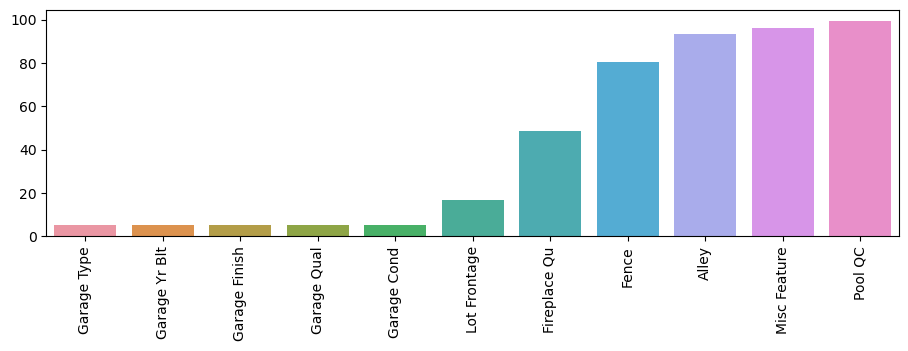

In [65]:
plt.figure(figsize=(11,3), dpi = 100)
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90)
;

### <span style = "color:#03738f; font-family:franklin gothic medium">Now what we are left with is above 1% missing value</span>

# <span style = "color:#03738f; font-family:franklin gothic medium">Dealing with Missing Values - Fixing data based on columns</span>

### <span style = "color:#03738f; font-family:franklin gothic medium">We saw from above there are more than 1% of rows are missing some of these feature values</span>

### <span style = "color:#03738f; font-family:franklin gothic medium">There are two main approached we follow for missing values:
* Fill the missing values
* Drop the feature column</span>
#### <span style = "color:#03738f; font-family:franklin gothic medium">Let's see pros and cons of each approach

## <span style = "color:#03738f; font-family:franklin gothic medium"> Drop the feature column:
* Very Simple to do.
* No Longer need to worry about that data feature in the future.
* Potential to lose a feature with possible important signal.
    * It becomes harder when you are having missing values 5% to 10% of the data of a feature and due to which you don't want to loose your 5% to 10% of rows.
* Should consider drop feature approach when many rows are NAN.


## <span style = "color:#03738f; font-family:franklin gothic medium"> When you have 5% to 10% of missing values you should start figuring out how to fill in the missing feature data:
* Potentially changing ground truth in data.
    * You are actually making up some data points which is very difficult to do as you require domain knowledge.
* Must decide on reasonable estimation to filled values.
* Must apply transformation to all future data for prediction.

### <span style = "color:#03738f; font-family:franklin gothic medium">Simplest case of filling missing feature data:
* Replace all NaN values with a reasonable assumption(e.g. zero if assumed NaN implied zero)</span>
### <span style = "color:#03738f; font-family:franklin gothic medium">Harder cases:
* Must use statistical methods based on other columns to fill in NaN values
    * It becomes a mix of Domain Knowlwdge, Human Intuation and statistical methods.</span>
 

### <span style = "color:#03738f; font-family:franklin gothic medium">Let's look at Statistical Estimation:
* Dataset about people with some age data missing
* Could use current career / education status to fill in the data(e.g. people currently in college fill in with 20 yrs)

### <span style = "color:#03738f; font-family:franklin gothic medium">Let's see other missing values

''

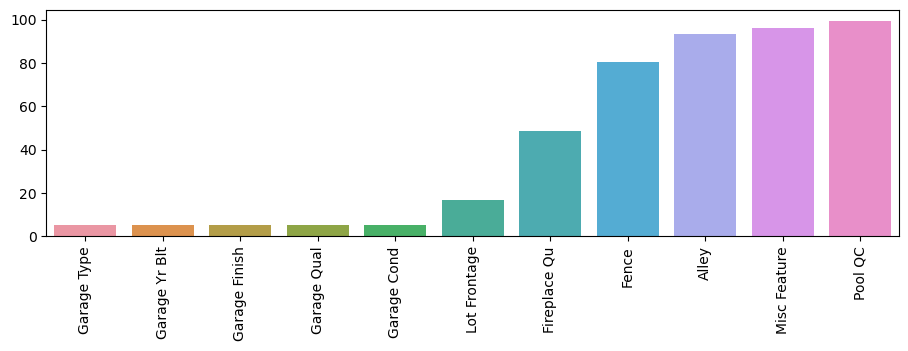

In [67]:
plt.figure(figsize=(11,3), dpi = 100)
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90)
;

### <span style = "color:#03738f; font-family:franklin gothic medium">We can see from the above there are some features with Garage , we can use the same appraoch as we did for Basement columns above

In [68]:
garage_str_cols = ['Garage Type', 'Garage Finish', "Garage Qual",'Garage Cond']

In [69]:
data[garage_str_cols] = data[garage_str_cols].fillna('None')

In [70]:
percent_nan = percent_missing(data)

''

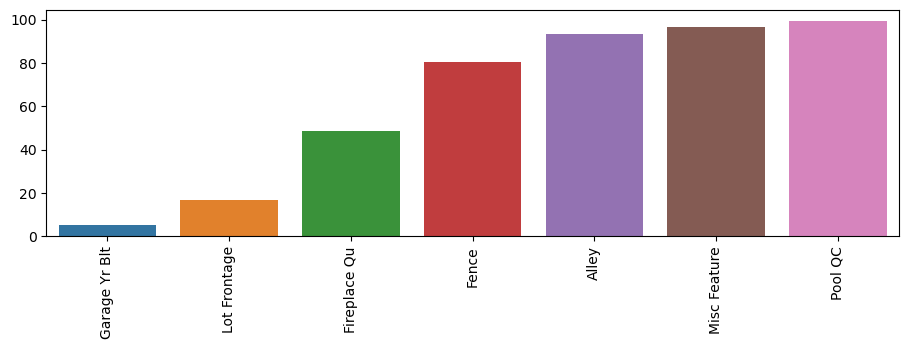

In [71]:
plt.figure(figsize=(11,3), dpi = 100)
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90)
;

In [73]:
data['Garage Yr Blt'] = data['Garage Yr Blt'].fillna(0)

In [74]:
percent_nan = percent_missing(data)

''

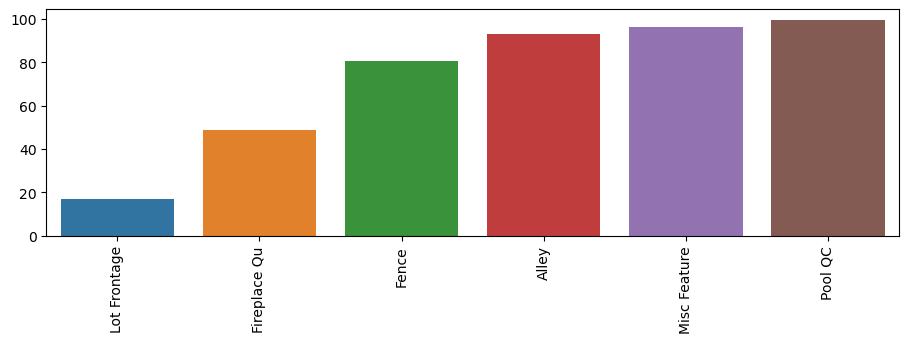

In [75]:
plt.figure(figsize=(11,3), dpi = 100)
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90)
;

## <span style = "color:#03738f; font-family:franklin gothic medium"> Now we can see there are few features has missing data and starting with almost 20%.
* Now we can see features like Fence, Alley Misc Feature, Pool QC they have almost and above 80% data missing, we can here use the approach to drop them.


In [ ]:
data = data.drop(["Pool QC", "Misc Feature", "Alley","Fence"], axis =1)

''

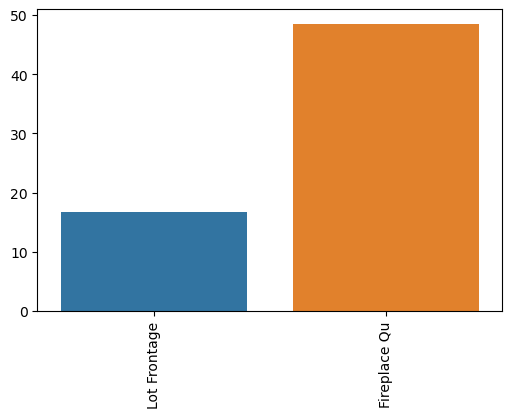

In [82]:
percent_nan = percent_missing(data)

plt.figure( dpi = 100)
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90)
;

### <span style = "color:#03738f; font-family:franklin gothic medium">Now we have two features left.
* Now we are entering harder approach, we need to be carefull on them and lot of thinking as we can't just drop them as percentage isn't too large or either fill them with none or zero as the percentage missing is neither too small

### <span style = "color:#03738f; font-family:franklin gothic medium"> Lets Explore these features

In [83]:
data["Fireplace Qu"].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

###  <span style = "color:#03738f; font-family:franklin gothic medium">Since these columns are having String values we can replace them with None as we did before

In [84]:
data["Fireplace Qu"]= data["Fireplace Qu"].fillna("None")

### <span style = "color:#03738f; font-family:franklin gothic medium"> Now let's check another one

In [85]:
data["Lot Frontage"]

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2925     37.0
2926      NaN
2927     62.0
2928     77.0
2929     74.0
Name: Lot Frontage, Length: 2925, dtype: float64

## <span style = "color:#03738f; font-family:franklin gothic medium"> We can see it's a numeric feature with missing values, here it comes to the harder part to impute these values.
* We will require to use domain knowledge and look at the other featurs to impute it
* With this feature we will use another feature which is Neighbourhood

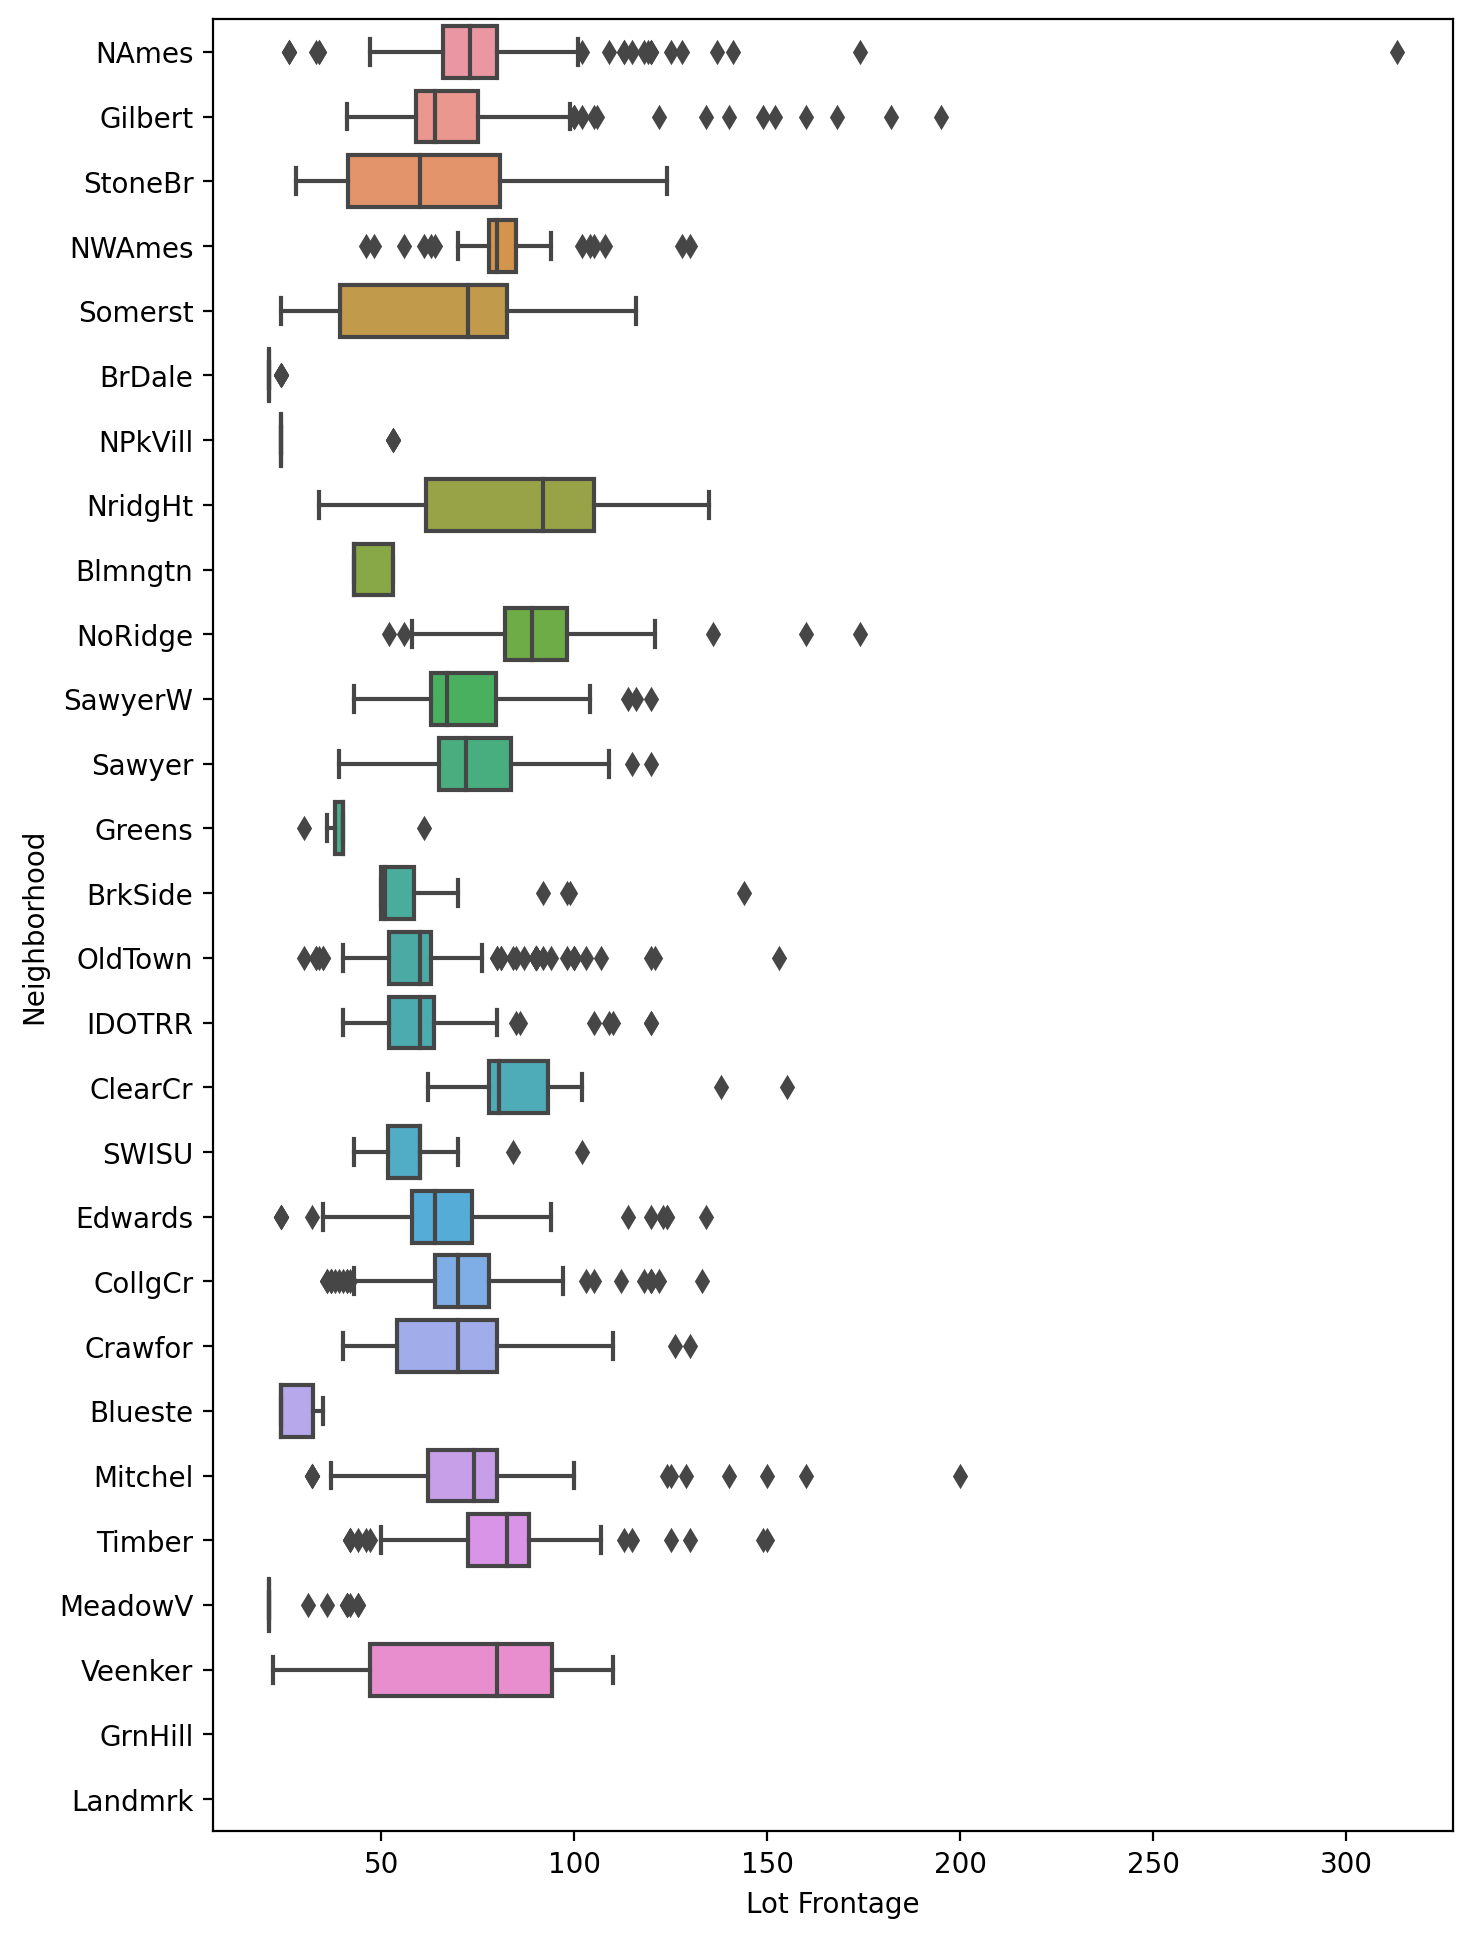

In [89]:
plt.figure(figsize=(8,12), dpi = 200)
sns.boxplot(x = 'Lot Frontage', y = 'Neighborhood', data = data, orient='h');

In [90]:
data.groupby("Neighborhood")['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

### <span style = "color:#03738f; font-family:franklin gothic medium"> Here we will try to fill the missing "Lot Frontage" value based on the aggregated values of "Neighbourhood". For this we will use Pandas Trasnform method
* Pandas Transfrom methods allows us to combine grouby call with apply method

In [99]:
data["Lot Frontage"]= data.groupby("Neighborhood")['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))# just like apply call

### <span style = "color:#03738f; font-family:franklin gothic medium">We will do a final check now if there is any missing values left

In [100]:
data.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

## <span style = "color:#03738f; font-family:franklin gothic medium"> We can see now there are only three missing values which now we can think to drop them

In [103]:
data["Lot Frontage"] = data["Lot Frontage"].fillna(0)

In [104]:
data.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

# <span style = "color:#03738f; font-family:franklin gothic medium">Dealing with categorical Data

### <span style = "color:#03738f; font-family:franklin gothic medium"> You will come across some numerical columns but they are categorical columns. For e.g. "Overall Qual" it is a numerical feature but the numbers are referring to ratings one the scale of 1 being "Very Poor" and 10 being "Very Excellent". 

#### <span style = "color:red; font-family:franklin gothic medium">This scenario of catageorical features being numeric is case of Integer Encoding. We some other features as well like "MSSubClass which is an example to Integer Encoding

#### <span style = "color:#03738f; font-family:franklin gothic medium"> We can convet them to string

In [107]:
data["MS SubClass"] = data["MS SubClass"].apply(str)

### <span style = "color:#03738f; font-family:franklin gothic medium">Once it is Converted to string we can easily create Dummy Varibles by using pd.get_dummies

### <span style = "color:#03738f; font-family:franklin gothic medium"> We can first identify all the columns which are categorical variables

In [109]:
data.select_dtypes(include='object') # object to check only string data

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2926,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2927,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,None,None,None,None,None,Y,WD,Normal
2928,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [110]:
data_object_df = data.select_dtypes(include='object')
# we can do the same way to identify the numerical columns


In [112]:
data_numeric_df = data.select_dtypes(exclude = "object")

In [117]:
data_object_dummies = pd.get_dummies(data_object_df,drop_first=True)

In [118]:
data_object_dummies

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2926,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2928,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


### <span style = "color:#03738f; font-family:franklin gothic medium"> We can see it has created 238 columns which we can reduce while doing regularization using Lasso

## <span style = "color:#03738f; font-family:franklin gothic medium"> Lets join back out numerica and dummies DataFrame

In [119]:
final_df = pd.concat([data_object_dummies,data_numeric_df], axis  = 1)

In [120]:
final_df

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,0,0,0,0,1,0,0,0,0,0,...,210,62,0,0,0,0,0,5,2010,215000
1,0,0,0,0,1,0,0,0,0,0,...,140,0,0,0,120,0,0,6,2010,105000
2,0,0,0,0,1,0,0,0,0,0,...,393,36,0,0,0,0,12500,6,2010,172000
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4,2010,244000
4,0,0,0,0,0,0,0,0,0,1,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,0,0,0,0,0,0,0,0,0,...,120,0,0,0,0,0,0,3,2006,142500
2926,0,0,0,0,1,0,0,0,0,0,...,164,0,0,0,0,0,0,6,2006,131000
2927,0,0,0,0,0,0,0,0,0,0,...,80,32,0,0,0,0,700,7,2006,132000
2928,0,0,0,0,1,0,0,0,0,0,...,240,38,0,0,0,0,0,4,2006,170000
